<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-03-09 09:09:13--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite’

survey-results-publ 100%[===================>] 201.62M  46.8MB/s    in 4.2s    

2025-03-09 09:09:20 (47.5 MB/s) - ‘survey-results-public.sqlite’ saved [211415040/211415040]



#### 2. Connect to the Database


**Install the needed libraries**


In [2]:
!pip install pandas

In [3]:
!pip install matplotlib

In [10]:
!pip install seaborn

In [12]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [5]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [6]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


Table_Name
0       main

#### Demo 3: Group Data by Age


In [7]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


In [32]:
def remove_outliers_iqr(df, column_name):
    """
    Removes outliers from a DataFrame column using the IQR method.
    
    Parameters:
    - df (DataFrame): The DataFrame containing the data.
    - column_name (str): The column name to check for outliers.
    >
    Returns:
    - df_cleaned (DataFrame): The DataFrame with outliers removed.
    """
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    
    # Calculate the IQR (Interquartile Range)
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds to detect outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Remove outliers: Keep rows where the column value is between the lower and upper bounds
    df_cleaned = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    
    return df_cleaned

In [21]:
QUERY = "SELECT CompTotal FROM main"
df = pd.read_sql_query(QUERY, conn)
df = df.dropna()

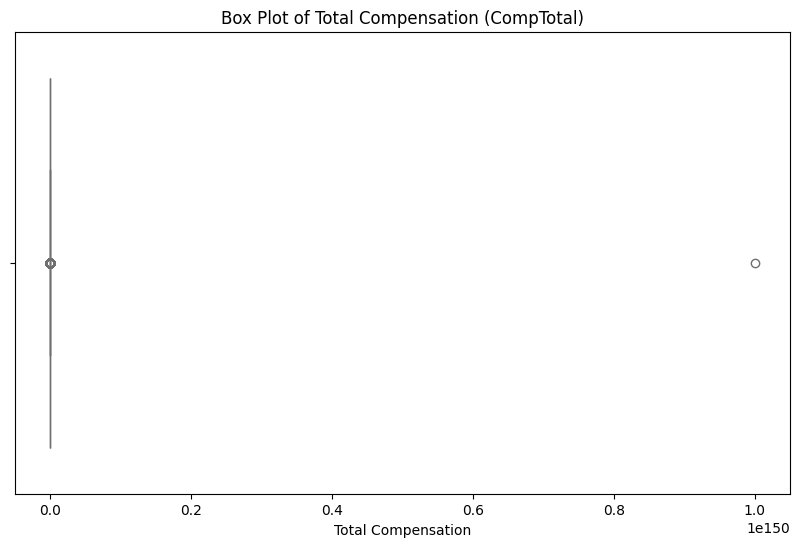

In [22]:
#Before removing outliers 

# Plot a box plot for CompTotal
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["CompTotal"], color="skyblue")

# Customize the plot
plt.xlabel("Total Compensation")
plt.title("Box Plot of Total Compensation (CompTotal)")

# Show the plot
plt.show()


In [23]:
#After removing outliers 

df_clean = remove_outliers_iqr(df,"CompTotal")

# Plot a box plot for CompTotal
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_clean["CompTotal"], color="skyblue")

# Customize the plot
plt.xlabel("Total Compensation")
plt.title("Box Plot of Total Compensation (CompTotal)")

# Show the plot
plt.show()

**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


In [28]:
QUERY = "SELECT Age FROM main"
df_Age = pd.read_sql_query(QUERY, conn)
#df_Age = df_Age.dropna()
df_Age = df_Age[df_Age['Age']!= 'Prefer not to say']


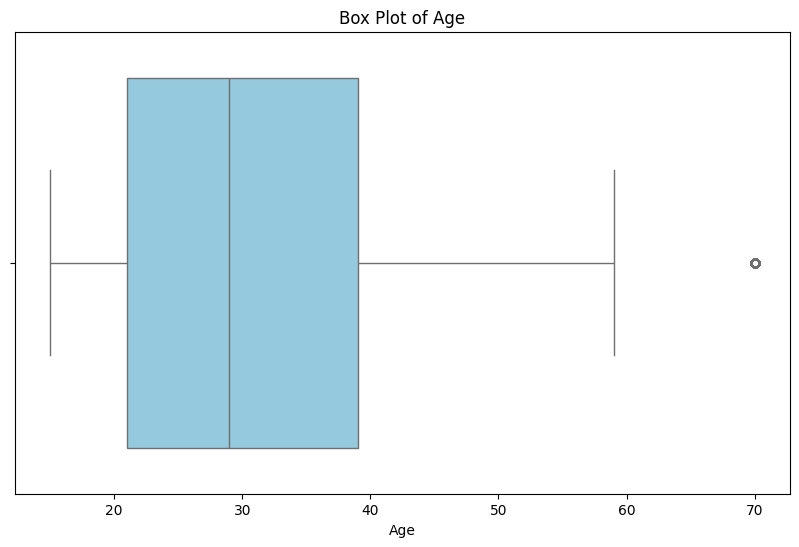

In [29]:

# Map the age groups to their midpoints or representative value
age_mapping = {
    "18-24 years old": 21,
    "25-34 years old": 29,
    "35-44 years old": 39,
    "45-54 years old": 49,
    "55-64 years old": 59,
    "Under 18 years old": 15,  # Assumption: using 15 for under 18 years
    "65 years or older": 70    # Assumption: using 70 for 65+ years
}

# Add a column for the numeric representation of Age
df_Age["Age"] = df_Age["Age"].map(age_mapping)

# Plot a box plot for Age
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_Age["Age"], color="skyblue")

# Customize the plot
plt.xlabel("Age")
plt.title("Box Plot of Age")

# Show the plot
plt.show()

### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


/tmp/ipykernel_1274/707377481.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Age'], y=df["CompTotal"], palette="Set3")


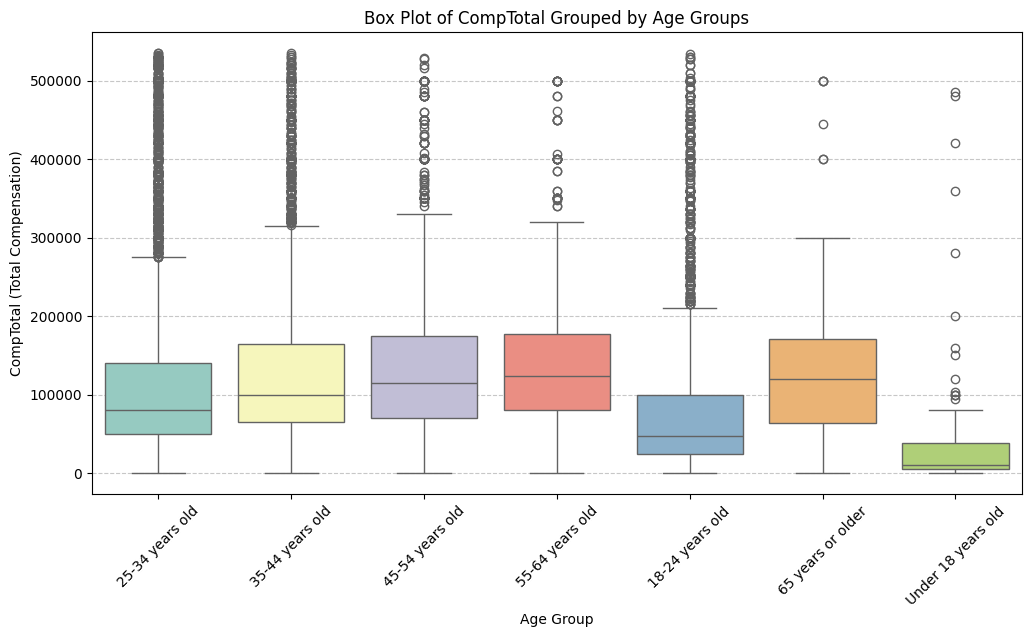

In [40]:
QUERY = "SELECT Age, CompTotal FROM main"
df = pd.read_sql_query(QUERY, conn)
# Remove rows where CompTotal or Age is missing
df = df.dropna(subset=["CompTotal", "Age"])
df = remove_outliers_iqr(df, "CompTotal")
df = df[df["Age"] != 'Prefer not to say']
# Create a box plot of CompTotal grouped by Age
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Age'], y=df["CompTotal"], palette="Set3")

# Customize the plot
plt.xlabel("Age Group")
plt.ylabel("CompTotal (Total Compensation)")
plt.title("Box Plot of CompTotal Grouped by Age Groups")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


/tmp/ipykernel_1274/4135089401.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["JobSatBin"], y=df["CompTotal"], palette="Set2")


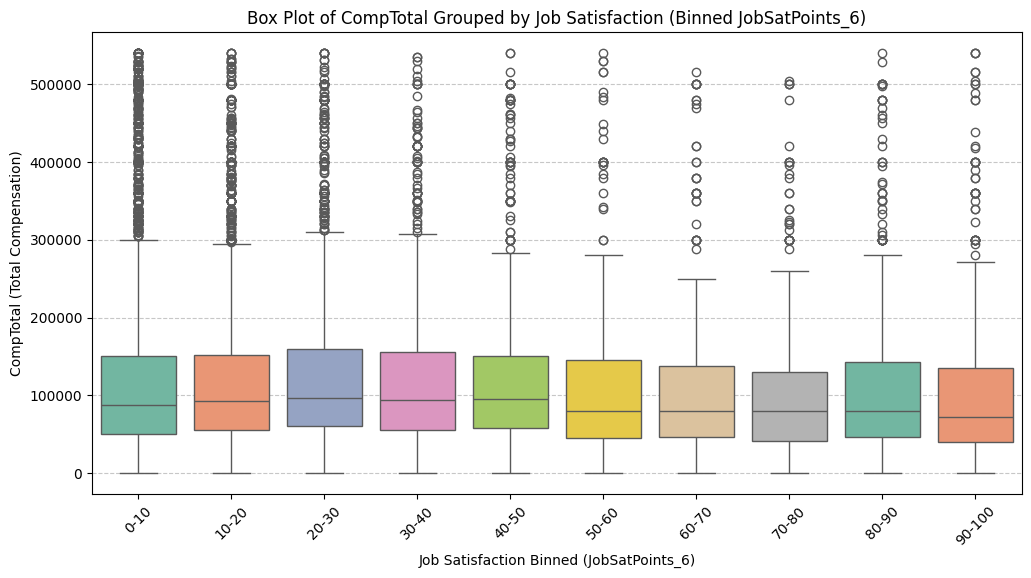

In [44]:
QUERY = "SELECT JobSatPoints_6, CompTotal FROM main"
df = pd.read_sql_query(QUERY, conn)
df = df.dropna()

#Removing outliers

df = remove_outliers_iqr(df,"CompTotal")

# Define bins and labels for JobSatPoints_6
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]  # Adjust bins based on the data
labels = ["0-10", "10-20", "20-30", "30-40", "40-50", "50-60", "60-70", "70-80","80-90","90-100"]

# Create a new column for the binned job satisfaction points
df["JobSatBin"] = pd.cut(df["JobSatPoints_6"], bins=bins, labels=labels, right=True, include_lowest=True)

# Create a box plot of CompTotal grouped by JobSatBins
plt.figure(figsize=(12, 6))
sns.boxplot(x=df["JobSatBin"], y=df["CompTotal"], palette="Set2")

# Customize the plot
plt.xlabel("Job Satisfaction Binned (JobSatPoints_6)")
plt.ylabel("CompTotal (Total Compensation)")
plt.title("Box Plot of CompTotal Grouped by Job Satisfaction (Binned JobSatPoints_6)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


/tmp/ipykernel_1274/325467494.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_filtered['DevType'], y=df_filtered['ConvertedCompYearly'], palette="Set3")


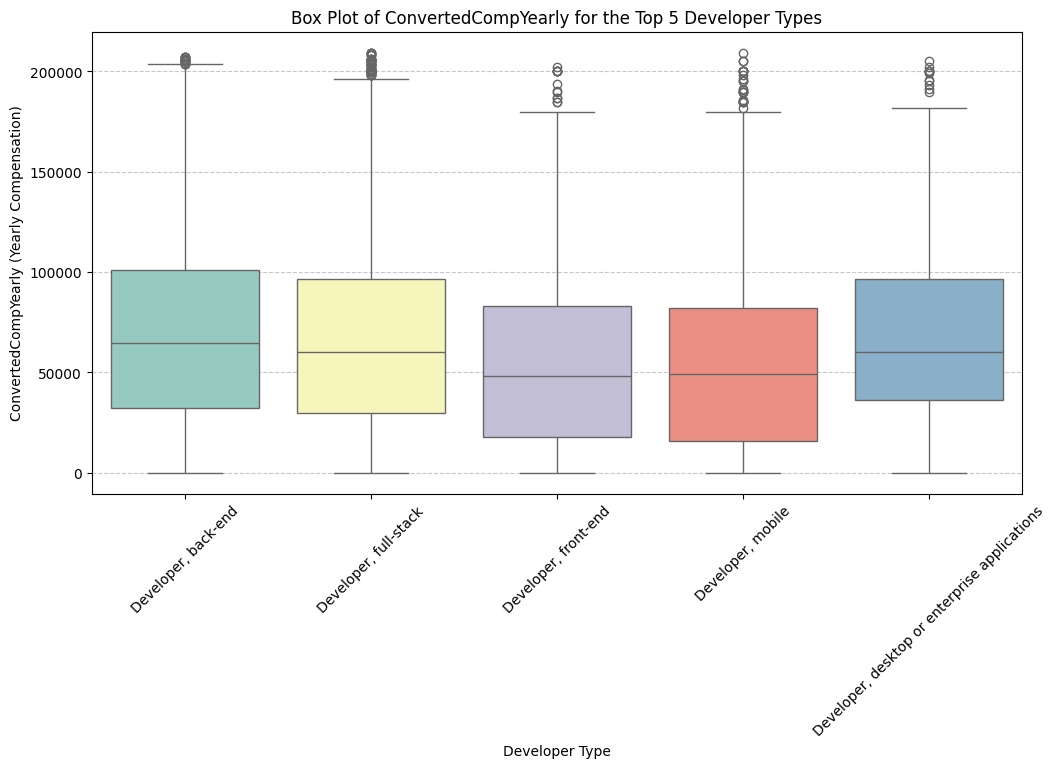

In [46]:
# Assuming df is already loaded from the database with 'DevType' and 'ConvertedCompYearly' columns
QUERY = "SELECT DevType, ConvertedCompYearly FROM main"
df = pd.read_sql_query(QUERY, conn)

# Remove rows where ConvertedCompYearly or DevType is missing
df = df.dropna(subset=["ConvertedCompYearly", "DevType"])

# Get the top 5 most common Developer Types based on frequency
top_dev_types = df['DevType'].value_counts().head(5).index.tolist()

# Filter the data to include only the top 5 Developer Types
df_filtered = df[df['DevType'].isin(top_dev_types)]

df_filtered = remove_outliers_iqr(df_filtered,"ConvertedCompYearly")

# Create a box plot of ConvertedCompYearly grouped by Developer Type
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_filtered['DevType'], y=df_filtered['ConvertedCompYearly'], palette="Set3")

# Customize the plot
plt.xlabel("Developer Type")
plt.ylabel("ConvertedCompYearly (Yearly Compensation)")
plt.title("Box Plot of ConvertedCompYearly for the Top 5 Developer Types")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


/tmp/ipykernel_1274/1525105202.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_filtered['Country'], y=df_filtered['CompTotal'], palette="Set2")


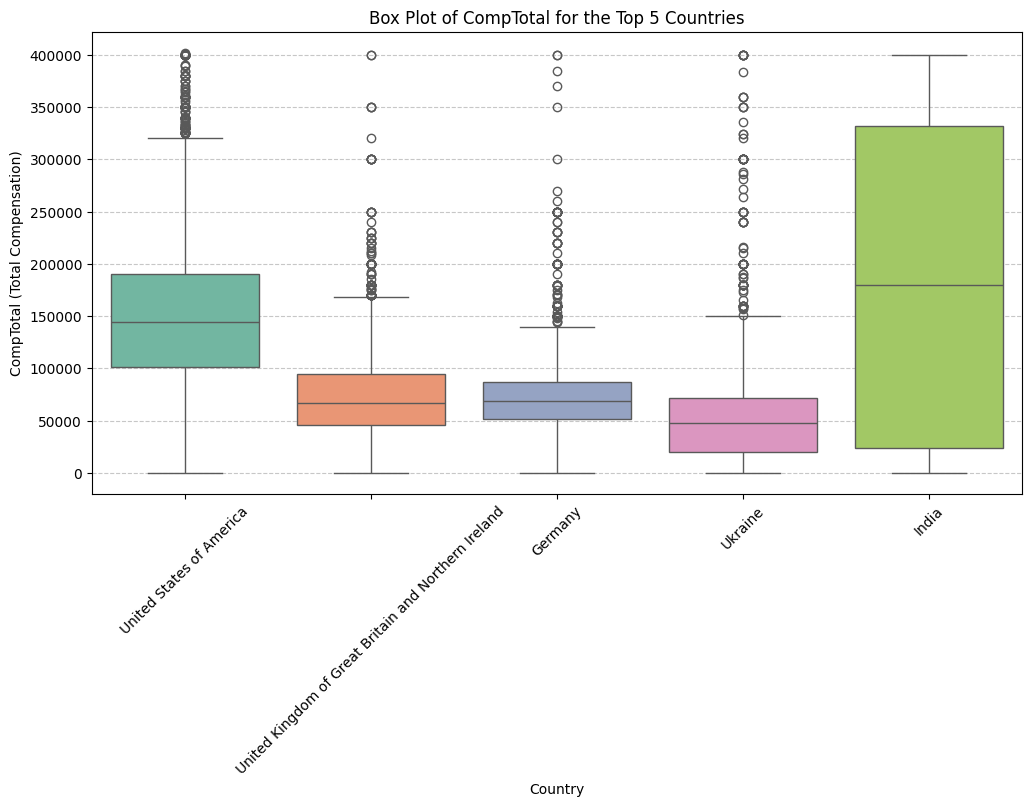

In [47]:
# Assuming df is already loaded from the database with 'Country' and 'CompTotal' columns
QUERY = "SELECT Country, CompTotal FROM main"
df = pd.read_sql_query(QUERY, conn)

# Remove rows where CompTotal or Country is missing
df = df.dropna(subset=["CompTotal", "Country"])

# Get the top 5 most common countries based on frequency
top_countries = df['Country'].value_counts().head(5).index.tolist()

# Filter the data to include only the top 5 Countries
df_filtered = df[df['Country'].isin(top_countries)]

#Removing outliers
df_filtered = remove_outliers_iqr(df_filtered,"CompTotal")

# Create a box plot of CompTotal grouped by Country
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_filtered['Country'], y=df_filtered['CompTotal'], palette="Set2")

# Customize the plot
plt.xlabel("Country")
plt.ylabel("CompTotal (Total Compensation)")
plt.title("Box Plot of CompTotal for the Top 5 Countries")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


/tmp/ipykernel_1274/2785760259.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Employment'], y=df['CompTotal'], palette="Set2")


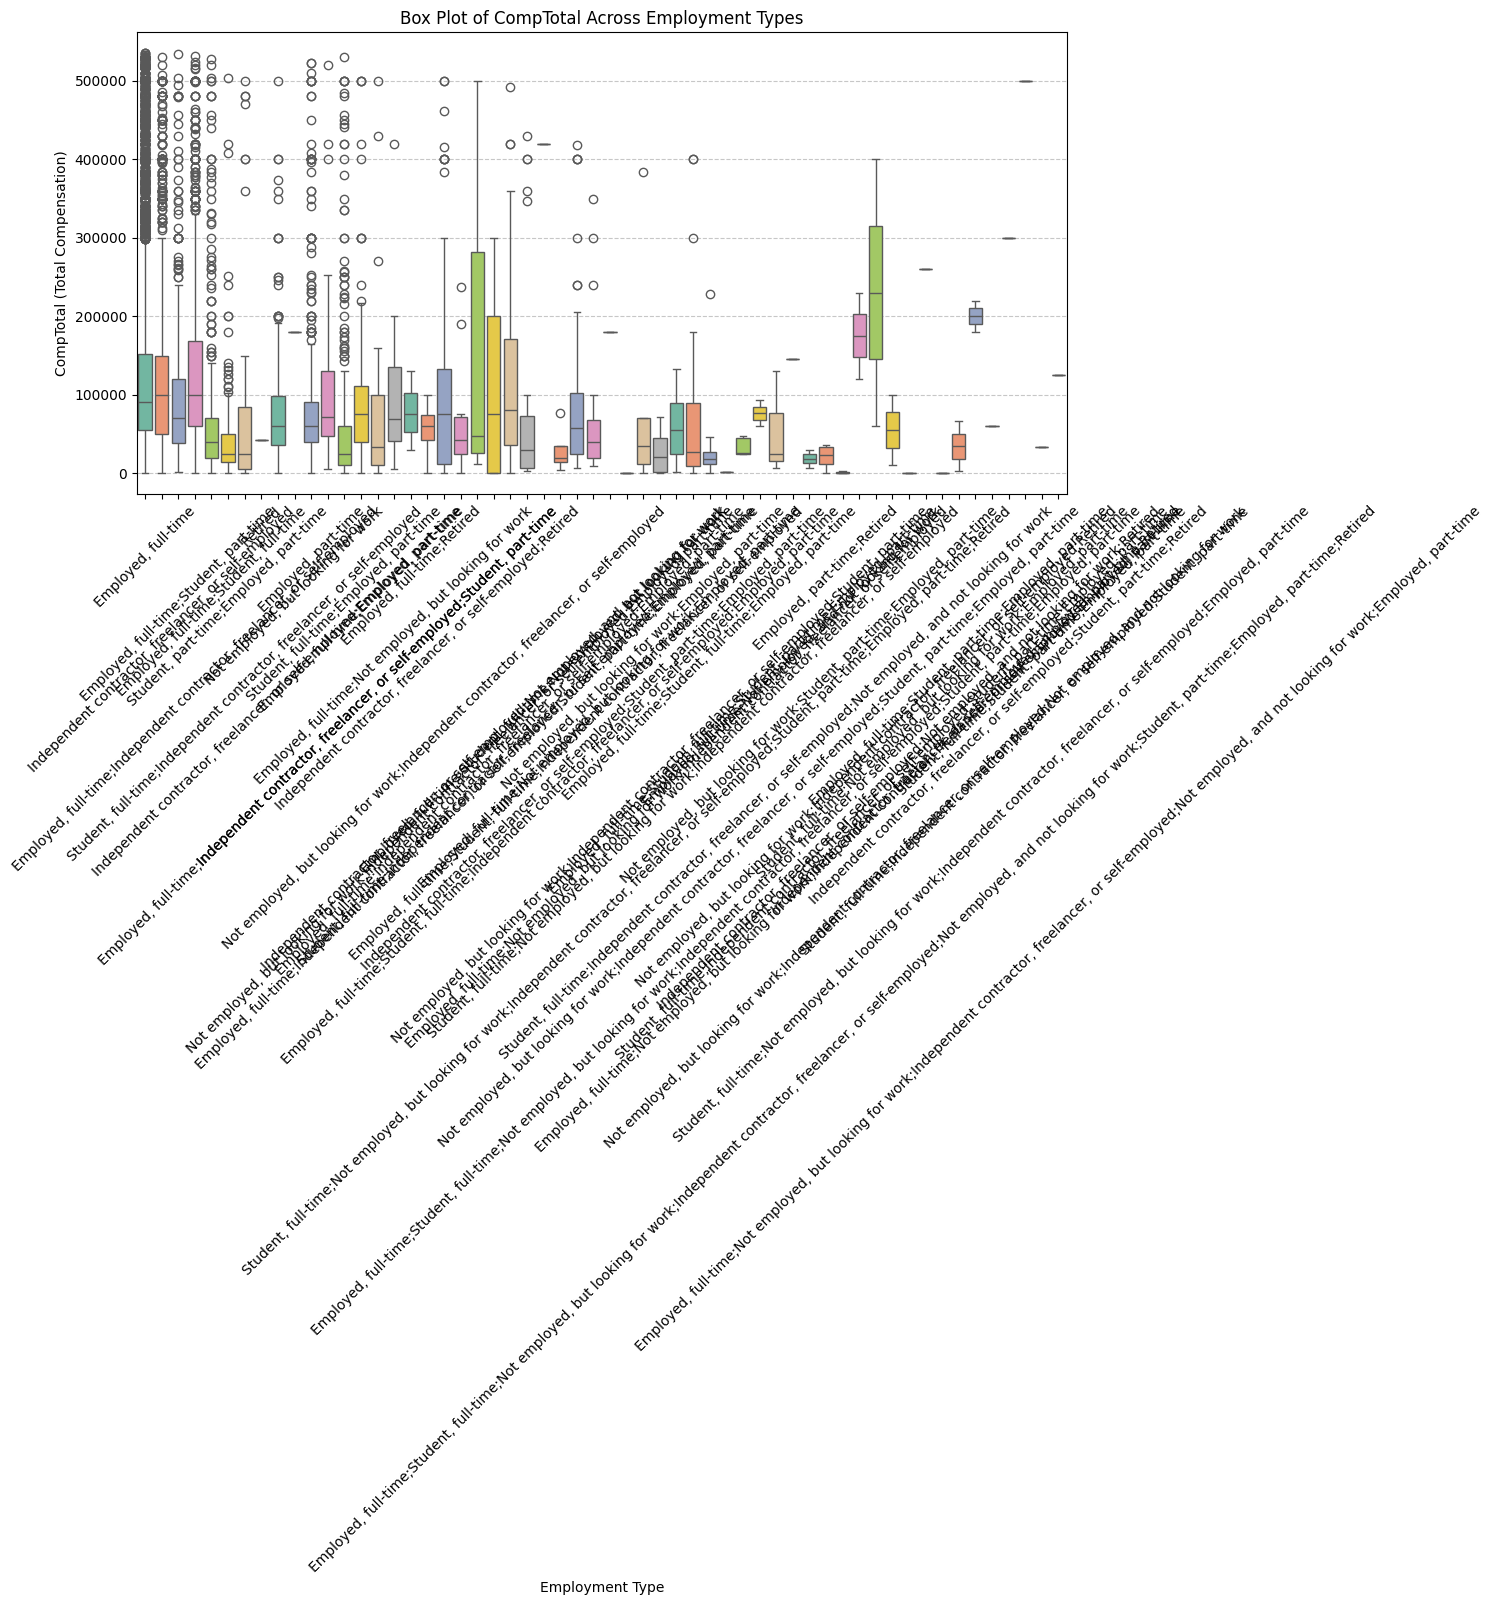

In [49]:
# Assuming df is already loaded from the database with 'EmploymentType' and 'CompTotal' columns
QUERY = "SELECT Employment, CompTotal FROM main"
df = pd.read_sql_query(QUERY, conn)

# Remove rows where CompTotal or EmploymentType is missing
df = df.dropna(subset=["CompTotal", "Employment"])

#Removing outliers
df = remove_outliers_iqr(df,"CompTotal")

# Create a box plot of CompTotal grouped by EmploymentType
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Employment'], y=df['CompTotal'], palette="Set2")

# Customize the plot
plt.xlabel("Employment Type")
plt.ylabel("CompTotal (Total Compensation)")
plt.title("Box Plot of CompTotal Across Employment Types")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


/tmp/ipykernel_1274/1363195124.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df['JobSatPoints_6'], x=df['YearsCodePro'], palette="Set2")


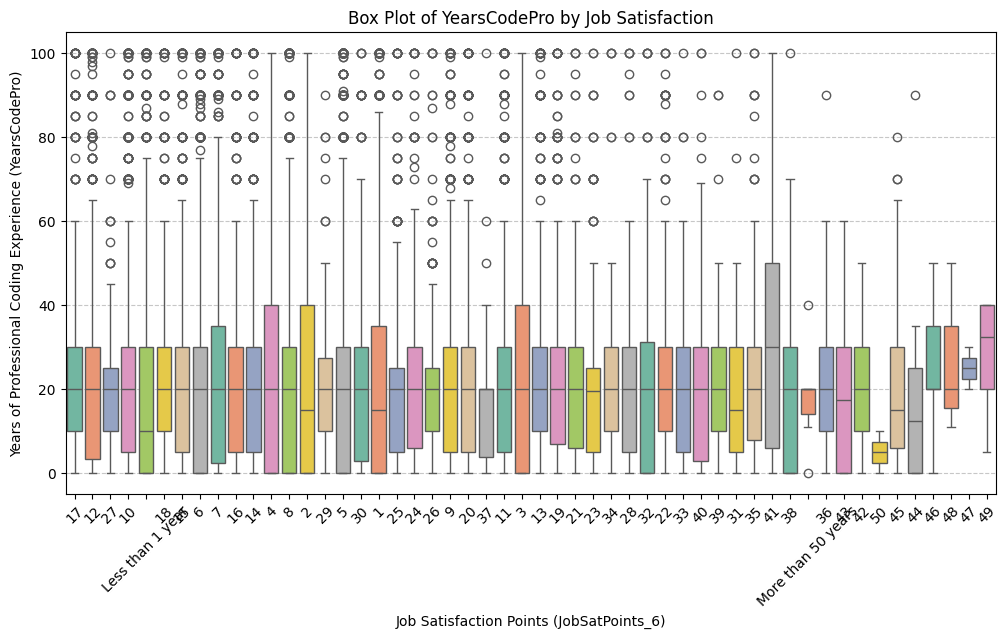

In [53]:
# Assuming df is already loaded with 'YearsCodePro' and 'JobSatPoints_6' columns
QUERY = "SELECT YearsCodePro, JobSatPoints_6 FROM main"
df = pd.read_sql_query(QUERY, conn)

# Remove rows where YearsCodePro or JobSatPoints_6 is missing
df = df.dropna(subset=["YearsCodePro", "JobSatPoints_6"])

# Define bins and labels for JobSatPoints_6
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]  # Adjust bins based on the data
labels = ["0-10", "10-20", "20-30", "30-40", "40-50", "50-60", "60-70", "70-80","80-90","90-100"]

# Create a new column for the binned job satisfaction points
df["JobSatBin"] = pd.cut(df["JobSatPoints_6"], bins=bins, labels=labels, right=True, include_lowest=True)

# Create a box plot of YearsCodePro grouped by JobSatPoints_6 (Job Satisfaction)
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['JobSatPoints_6'], x=df['YearsCodePro'], palette="Set2")

# Customize the plot
plt.xlabel("Job Satisfaction Points (JobSatPoints_6)")
plt.ylabel("Years of Professional Coding Experience (YearsCodePro)")
plt.title("Box Plot of YearsCodePro by Job Satisfaction")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [ ]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
